In [4]:
from model import ConvNet
from train import train, test
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from dataset import QuickDrawMemmapDataset, build_default_class_files

In [5]:
x1 = np.load('data/full_numpy_bitmap_airplane.npy')
print(x1.shape)  
print(np.ones((x1.shape[0],1)*0))
z = (np.ones(x1.shape[0]))
print(np.shape(z))
# i want z to be  column vector of ones of sizex1.shape[0] in one line of code
y1 = np.zeros((x1.shape[0],1))
print(y1[:,0].shape)

(151623, 784)
1.0
(151623,)
(151623,)


(151623, 784)


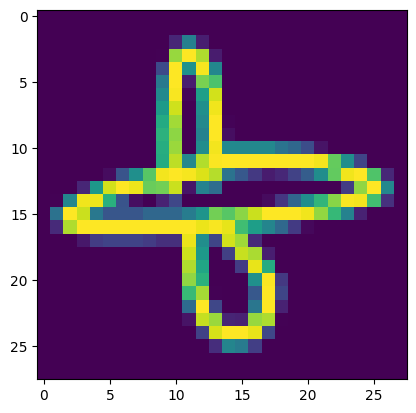

In [6]:
print(np.shape(x1))
plt.imshow(x1[5,:].reshape(28,28))
# si data est une matrice de taille [N,784], faire data[1] ou data[1,:] extrait la premiere image de taille (784*1)

### Creation de matrice X avec labels

In [ ]:
#méthode alternative pour contruire matrice X et y concaténés

class_files = build_default_class_files('data')
class_files = class_files[:5]  # ne garder que les 5 premiers
print(class_files[0])
X_s = []
Y_s = []
for class_file in class_files:
    x_class = np.load(class_file.path, mmap_mode='r')
    y_class = class_file.label * np.ones(x_class.shape[0], dtype=np.int64)
    #print(x_class.shape)
    #print(y_class) # nombre d'images pour cette classe
    
    X_s.append(x_class)
    Y_s.append(y_class)
X = np.concatenate(X_s, axis=0) if len(X_s) > 0 else x_class
Y = np.concatenate(Y_s, axis=0) if len(Y_s) > 0 else y_class
#print(X.shape)
#print(Y.reshape(-1, 1).shape)
X_mat = np.concatenate([X, Y.reshape(-1, 1)], axis=1)
# X_mat.shape -> (N, 785)

### Splitting en train test et val sets